In [2]:
%pwd
# https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/
# https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
# https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051
# https://towardsdatascience.com/time-series-in-python-part-3-forecasting-taxi-trips-with-lstms-277afd4f811

'd:\\dev\\python_ml'

In [4]:
import pandas as pd
appl_data = pd.read_csv("./AAPL.csv")
print(appl_data.head())
print(appl_data.shape)

         Date      Open      High       Low     Close  Adj Close     Volume
0  2000-05-22  3.348214  3.348214  3.071429  3.212054   2.133590  188876800
1  2000-05-23  3.232143  3.334821  3.058036  3.064732   2.035733  129396400
2  2000-05-24  3.078125  3.205357  2.964286  3.131696   2.080215  169615600
3  2000-05-25  3.160714  3.309150  3.071429  3.116629   2.070205  101687600
4  2000-05-26  3.142857  3.209821  3.044643  3.084821   2.049076   45287200
(4778, 7)


In [5]:
appl_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [34]:
import datetime
import requests
from bokeh.plotting import figure, show, output_file

In [35]:
appl_data['Date'] = pd.to_datetime(appl_data['Date'])

In [36]:
appl_data = appl_data.sort_values(by=['Date'])
df = appl_data


In [41]:
from math import pi

inc = df.Close > df.Open
dec = df.Open > df.Close
w = 12*60*60*1000
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

title = 'AAPL' + ' chart'
p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title=title)
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(df.Date, df.High, df.Date, df.Low, color="black")
p.vbar(df.Date[inc], w, df.Open[inc], df.Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df.Date[dec], w, df.Open[dec], df.Close[dec], fill_color="#F2583E", line_color="black")

#Store as a HTML file
output_file("stock_information.html", title="candlestick example")

show(p)

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
appl_data = pd.read_csv("./appl_train2.csv")
print(appl_data.head())
print(appl_data.shape)

df = appl_data
df_training_processed = df.iloc[:, 1:2].values

df_training_processed

         Date      Open      High       Low     Close  Adj Close     Volume
0  2001-01-02  1.062500  1.089286  1.040179  1.062500   0.705760  113078000
1  2001-01-03  1.035714  1.191964  1.031250  1.169643   0.776929  204268400
2  2001-01-04  1.295757  1.321429  1.200893  1.218750   0.809549  184849000
3  2001-01-05  1.209821  1.241071  1.147321  1.169643   0.776929  103089000
4  2001-01-08  1.209821  1.213164  1.138393  1.183036   0.785826   93424800
(2460, 7)


array([[ 1.0625  ],
       [ 1.035714],
       [ 1.295757],
       ...,
       [42.105713],
       [42.201427],
       [42.885715]])

In [112]:
# Data Normalization
# As a rule of thumb, whenever you use a neural network, you should normalize or scale your data. 
# We will use MinMaxScaler class from the sklear.preprocessing library to scale our data between 0 and 1. 
# The feature_range parameter is used to specify the range of the scaled data. Execute the following script:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

df_training_scaled = scaler.fit_transform(df_training_processed)

In [113]:
features_set = []
labels = []
for i in range(60, 2460):
    features_set.append(df_training_scaled[i-60:i, 0])
    labels.append(df_training_scaled[i, 0])
    
features_set, labels = np.array(features_set), np.array(labels)

print(df_training_scaled[62,0])
print(df_training_scaled[0:4, 0])
print(labels)

0.015491734587595011
[0.00320901 0.0025706  0.00876832 0.00672017]
[0.01494697 0.01627483 0.01549173 ... 0.98140987 0.98369106 1.        ]


In [100]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [101]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [102]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
2400/2400 [==============================] - 17s 7ms/step - loss: 0.0119
Epoch 2/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0023
Epoch 3/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0021
Epoch 4/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0028A: 1s - 
Epoch 5/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0019
Epoch 6/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0018
Epoch 7/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0017
Epoch 8/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0015
Epoch 9/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0016
Epoch 10/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0016
Epoch 11/100
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0018
Epoch 12/100
2400/2400 [==============================] - 7s 3ms/

2400/2400 [==============================] - 7s 3ms/step - loss: 7.1057e-04A: 2s - loss: - ETA: 1s
Epoch 92/100
2400/2400 [==============================] - 7s 3ms/step - loss: 7.1981e-04
Epoch 93/100
2400/2400 [==============================] - 7s 3ms/step - loss: 7.3842e-04A: 0s - loss: 7.239
Epoch 94/100
2400/2400 [==============================] - 7s 3ms/step - loss: 7.9680e-04
Epoch 95/100
2400/2400 [==============================] - 7s 3ms/step - loss: 8.7287e-04
Epoch 96/100
2400/2400 [==============================] - 7s 3ms/step - loss: 7.2003e-04A: 1s 
Epoch 97/100
2400/2400 [==============================] - 7s 3ms/step - loss: 8.8633e-04
Epoch 98/100
2400/2400 [==============================] - 7s 3ms/step - loss: 6.9885e-04A: 0s - loss:
Epoch 99/100
2400/2400 [==============================] - 7s 3ms/step - loss: 7.6396e-04
Epoch 100/100
2400/2400 [==============================] - 7s 3ms/step - loss: 6.8045e-04


In [103]:
apple_testing_complete = pd.read_csv('./appl_test2.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values


[Text(0, 0.5, 'Open'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'app test open price')]

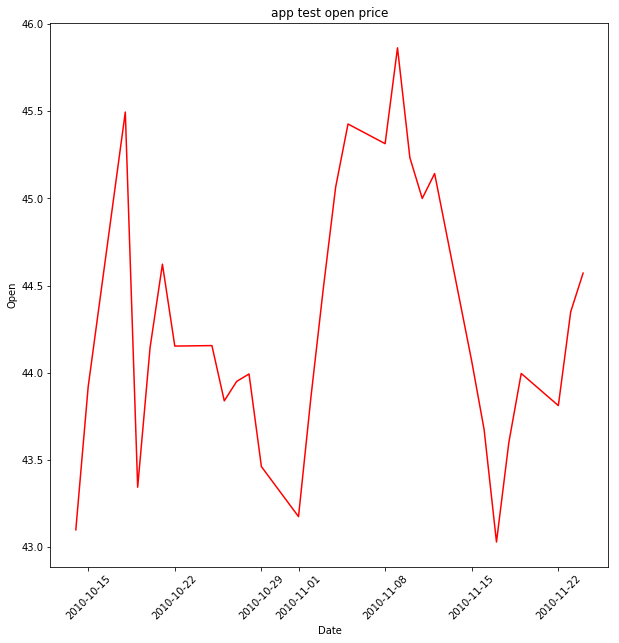

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

apple_testing_complete['Date'] = pd.to_datetime(apple_testing_complete['Date'])
ax.plot(apple_testing_complete['Date'],
        apple_testing_complete['Open'],
        color='red')

plt.setp(ax.get_xticklabels(), rotation=45)

ax.set(xlabel='Date',
      ylabel='Open',
      title='app test open price')

In [105]:
apple_total = pd.concat((df['Open'], apple_testing_complete['Open']), axis=0)


In [106]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values
print(test_inputs.shape)

(90,)


In [107]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [108]:
test_features = []
for i in range(60, 90):
    test_features.append(test_inputs[i-60:i, 0])

In [109]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

predictions = model.predict(test_features)

predictions = scaler.inverse_transform(predictions)

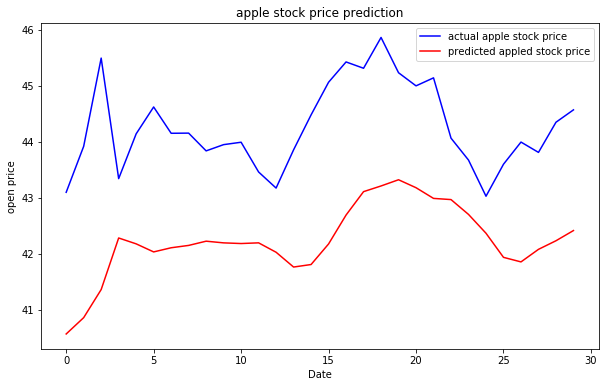

In [110]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='actual apple stock price')
plt.plot(predictions, color='red', label='predicted appled stock price')
plt.title('apple stock price prediction')
plt.xlabel('Date')
plt.ylabel('open price')
plt.legend()
plt.show()